In [1]:
# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Install required packages (if not already installed)
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/My Drive/Asteroid Collision Dataset V2.csv'
df = pd.read_csv(file_path, low_memory=False)

# Inspect the dataset
print("Dataset Shape:", df.shape)
print("First 5 Rows:\n", df.head())

Dataset Shape: (677494, 79)
First 5 Rows:
    diameter  extent  albedo  rot_per  GM  BV  UB  IR spec_B  spec_T  ...  \
0       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
1       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
2       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
3       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
4       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   

        rms  two_body  A1  A1_sigma  A2  A2_sigma  A3  A3_sigma  DT  DT_sigma  
0  0.000533       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
1  0.071263       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
2  0.000002       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
3       NaN         T NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
4  0.339380       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  

[5 rows x 79 column

In [3]:
# Missing Data Analysis
missing_summary = df.isnull().mean().sort_values(ascending=False) * 100
missing_summary = missing_summary[missing_summary > 0]
print("\nMissing Data Summary (Percentage of Missing Values):")
print(missing_summary)


Missing Data Summary (Percentage of Missing Values):
DT_sigma          100.000000
extent            100.000000
G                 100.000000
M1                100.000000
GM                100.000000
BV                100.000000
UB                100.000000
IR                100.000000
M2                100.000000
spec_T            100.000000
DT                100.000000
K1                100.000000
K2                100.000000
PC                100.000000
name               99.999852
prefix             99.999410
A3                 99.998967
A3_sigma           99.998967
A1_sigma           99.997491
A1                 99.997491
spec_B             99.992620
A2_sigma           99.976531
A2                 99.976531
n_del_obs_used     99.910700
n_dop_obs_used     99.910700
rot_per            99.801179
two_body           99.062427
albedo             99.040582
diameter_sigma     98.987002
diameter           98.986559
H_sigma            15.064635
sigma_per           0.937868
sigma_ad          

In [4]:
# Drop Columns with Excessive Missing Values and Irrelevant Columns
missing_threshold = 0.9  # 90%
cols_to_drop_missing = missing_summary[missing_summary > missing_threshold * 100].index.tolist()
irrelevant_columns = ['producer', 'equinox', 'orbit_id','pdes',]
cols_to_drop = list(set(cols_to_drop_missing + irrelevant_columns))

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("\nDropped Columns:")
for col in cols_to_drop:
    print(f" - {col}")


Dropped Columns:
 - spec_T
 - IR
 - producer
 - equinox
 - spec_B
 - A3
 - K1
 - A1_sigma
 - orbit_id
 - name
 - M2
 - albedo
 - rot_per
 - A3_sigma
 - DT_sigma
 - DT
 - pdes
 - two_body
 - diameter
 - GM
 - A1
 - BV
 - UB
 - n_del_obs_used
 - A2_sigma
 - extent
 - K2
 - prefix
 - PC
 - G
 - A2
 - diameter_sigma
 - M1
 - n_dop_obs_used


In [5]:
print(df.head())

          full_name         a         e          i          om           w  \
0         (1927 LA)  3.344072  0.333618  17.631497  191.717418  341.109523   
1         (1935 UZ)  2.149638  0.251325   4.728640  134.342070  281.563658   
2         (1937 CK)  2.320503  0.138476   6.549856  273.834058  130.418938   
3         (1939 RR)  2.904675  0.253684  13.139290  322.997330   64.837530   
4         (1942 RH)  2.257216  0.145324   4.223982  205.857738  134.532417   

          q        ad     per_y  data_arc  ...  sigma_w  sigma_ma  sigma_ad  \
0  2.228428  4.459715  6.115353      34.0  ...   1.1161   0.47857  0.032768   
1  1.609380  2.689895  3.151781       4.0  ...  33.7820  11.31700  0.435020   
2  1.999169  2.641838  3.534936      31.0  ...   2.0890  23.32100  0.004895   
3  2.167804  3.641545  4.950561      27.0  ...      NaN       NaN       NaN   
4  1.929189  2.585243  3.391313      10.0  ...  10.3150   8.20790  0.094289   

    sigma_n sigma_tp sigma_per  class   first_obs    las

In [6]:
# Missing Data Analysis
missing_summary = df.isnull().mean().sort_values(ascending=False) * 100
missing_summary = missing_summary[missing_summary > 0]
print("\nMissing Data Summary (Percentage of Missing Values):")
print(missing_summary)


Missing Data Summary (Percentage of Missing Values):
H_sigma           15.064635
sigma_per          0.937868
sigma_ad           0.937868
pha                0.937720
moid_ld            0.937573
sigma_n            0.937573
sigma_om           0.937573
sigma_w            0.937573
sigma_ma           0.937573
moid_jup           0.937573
sigma_i            0.937573
sigma_q            0.937573
sigma_a            0.937573
sigma_e            0.937573
sigma_tp           0.937573
moid               0.937573
data_arc           0.392771
H                  0.146717
condition_code     0.001033
t_jup              0.000295
per                0.000295
neo                0.000295
per_y              0.000295
ad                 0.000295
rms                0.000148
dtype: float64


In [7]:
# Data Cleaning and Type Conversion
columns_to_clean = ['H', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'n']
for col in columns_to_clean:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Impute Missing Values in Numeric Columns
from sklearn.impute import SimpleImputer
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [9]:
# Binary Mapping for 'neo' and 'pha'
binary_mapping = {'Y': 1, 'N': 0}
for col in ['neo', 'pha']:
    if col in df.columns:
        df[col] = df[col].map(binary_mapping)

In [10]:
# **Step 2: Identify Remaining Categorical Columns**
remaining_categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nRemaining Categorical Columns after Binary Mapping:", remaining_categorical_cols)


Remaining Categorical Columns after Binary Mapping: ['full_name', 'epoch_cal', 'tp_cal', 'class', 'first_obs', 'last_obs']


In [11]:
# Handle Date Columns
date_cols = ['epoch_cal', 'tp_cal', 'first_obs', 'last_obs']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce', format='%Y-%m-%d')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df.drop(columns=[col], inplace=True)  # Drop original column

print("\nData preprocessing complete. The DataFrame is ready for analysis.")


Data preprocessing complete. The DataFrame is ready for analysis.


In [12]:
remaining_categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nRemaining Categorical Columns after Date conversion:", remaining_categorical_cols)


Remaining Categorical Columns after Date conversion: ['full_name', 'class']


In [13]:
# Check unique values in the 'class' column
if 'class' in df.columns:
    print("Unique values in 'class' column:", df['class'].unique())

# One-hot encode the 'class' column
if 'class' in df.columns:
    df = pd.get_dummies(df, columns=['class'], prefix='class', drop_first=True)
    print("\nOne-hot encoding applied to 'class' column.")
    print("New columns added:", [col for col in df.columns if col.startswith('class_')])

Unique values in 'class' column: ['OMB' 'MCA' 'MBA' 'APO' 'AMO' 'IMB' 'ATE' 'IEO' 'TJN' 'HYA']

One-hot encoding applied to 'class' column.
New columns added: ['class_APO', 'class_ATE', 'class_HYA', 'class_IEO', 'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN']


In [14]:
print("Correlation with MOID:\n", df[['neo', 'pha', 'moid']].corr())

Correlation with MOID:
            neo       pha      moid
neo   1.000000  0.214061 -0.511961
pha   0.214061  1.000000 -0.114805
moid -0.511961 -0.114805  1.000000


In [15]:
# Create collision_risk based on moid
if 'moid' in df.columns:
    df['collision_risk'] = np.where(df['moid'] < 0.05, 1, 0)
    print("Created 'collision_risk' column based on 'moid'.")
else:
    print("'moid' column not found. Cannot create 'collision_risk'.")


Created 'collision_risk' column based on 'moid'.


In [16]:
# Check if collision_risk was created successfully
print(df[['moid', 'collision_risk']])


            moid  collision_risk
0       1.240420               0
1       0.629025               0
2       1.015530               0
3       1.230665               0
4       0.923138               0
...          ...             ...
677489  0.272574               0
677490  0.000087               1
677491  0.816015               0
677492  0.672539               0
677493  0.036665               1

[677494 rows x 2 columns]


In [17]:

# Step 2: Define features and target
selected_features = [
    'a', 'e', 'i', 'q', 'ad', 'moid', 'moid_ld', 'per_y',
    'condition_code', 'data_arc', 'n_obs_used', 'rms', 'H',
    'neo', 'pha',  # Include binary indicators
    'class_APO', 'class_ATE', 'class_HYA', 'class_IEO',
    'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB',
    'class_TJN', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i',
    'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n',
    'sigma_tp', 'sigma_per'
]

X = df[selected_features]
y = df['collision_risk']

# Step 3: Verify shapes
print("Feature Matrix Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Matrix Shape: (677494, 35)
Target Shape: (677494,)


## Code for Imputation

In [18]:
from sklearn.impute import SimpleImputer

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verify no missing values remain
print("Missing Values After Imputation:\n", X.isnull().sum().sum())


Missing Values After Imputation:
 0


## Scale Features

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for interpretability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Verify scaled data
print("Scaled Data Sample:\n", X_scaled.head())


Scaled Data Sample:
           a         e         i         q        ad          moid  \
0  0.036022  1.457138  1.089862  0.037420  1.130606  1.904554e-02   
1 -0.026644  0.676705 -0.779477 -1.123928 -0.400431 -1.174674e+00   
2 -0.017680 -0.393505 -0.515623 -0.392675 -0.442004 -4.200413e-01   
3  0.012969  0.699081  0.439040 -0.076312  0.422823  8.670627e-16   
4 -0.021000 -0.328565 -0.852591 -0.523959 -0.490963 -6.004322e-01   

        moid_ld     per_y  condition_code  data_arc  ...       sigma_a  \
0  1.904554e-02  0.197782    2.084778e+00 -1.355921  ... -2.318122e-03   
1 -1.174674e+00 -0.155798    2.436276e+00 -1.367457  ... -1.352698e-03   
2 -4.200413e-01 -0.110085    1.733279e+00 -1.357075  ... -2.378700e-03   
3 -5.703627e-16  0.058812   -1.560968e-16 -1.358613  ... -3.317669e-19   
4 -6.004322e-01 -0.127220    2.436276e+00 -1.365150  ... -2.145537e-03   

        sigma_q       sigma_i  sigma_om       sigma_w      sigma_ma  \
0 -2.653454e-03 -4.570209e-03 -0.004762 -4.45263

In [20]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (541995, 35) (541995,)
Testing Set Shape: (135499, 35) (135499,)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Check class distribution
class_distribution = y.value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)

Class Distribution (%):
 collision_risk
0    97.280271
1     2.719729
Name: proportion, dtype: float64


## Apply SMOTE for Oversampling

In [26]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Verify resampled class distribution
print("Resampled Class Distribution:\n", pd.Series(y_resampled).value_counts())


Resampled Class Distribution:
 collision_risk
0    659068
1    659068
Name: count, dtype: int64


## Train Random Forest with Resampled Data

In [ ]:
# Drop MOID-related features
X_no_moid = X.drop(columns=['moid', 'moid_ld'])

# Resample the dataset using SMOTE
X_resampled_no_moid, y_resampled_no_moid = smote.fit_resample(X_no_moid, y)

# Train Random Forest on the new dataset
rf_model_no_moid = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf_model_no_moid.fit(X_resampled_no_moid, y_resampled_no_moid)

# Evaluate on the original test set (without MOID features)
y_pred_no_moid = rf_model_no_moid.predict(X_test.drop(columns=['moid', 'moid_ld']))

# Classification Report
print("Classification Report Without MOID:")
print(classification_report(y_test, y_pred_no_moid))

# Confusion Matrix
print("Confusion Matrix Without MOID:")
print(confusion_matrix(y_test, y_pred_no_moid))


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # Adjust weights to balance classes
    n_jobs=-1
)

# Train the model on the resampled data
rf_model.fit(X_resampled, y_resampled)

# Predict on the original test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131814
           1       1.00      1.00      1.00      3685

    accuracy                           1.00    135499
   macro avg       1.00      1.00      1.00    135499
weighted avg       1.00      1.00      1.00    135499

Confusion Matrix:
[[131814      0]
 [     0   3685]]
Accuracy: 1.00


## Cross-Validation with Balanced Data

In [28]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=skf, scoring='f1_macro')
print("Stratified Cross-Validation F1-Macro Scores:", cv_scores)
print("Mean F1-Macro Score:", cv_scores.mean())

Stratified Cross-Validation F1-Macro Scores: [1. 1. 1. 1. 1.]
Mean F1-Macro Score: 1.0


Top 10 Most Important Features:
      Feature  Importance
5        moid    0.222830
6     moid_ld    0.198295
3           q    0.130204
12          H    0.102994
13        neo    0.081824
15  class_APO    0.057875
1           e    0.045465
0           a    0.034160
20  class_MBA    0.032327
7       per_y    0.031126


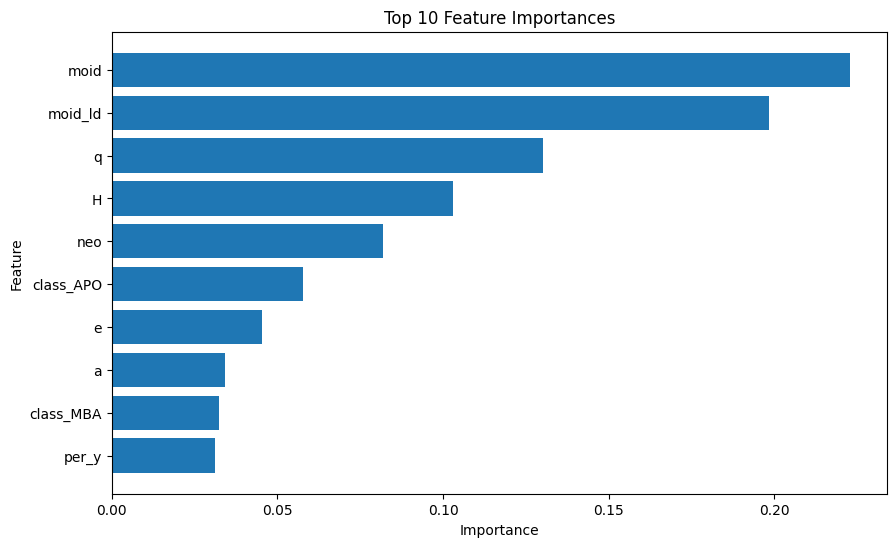

In [29]:
# Feature Importance Analysis
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot top 10 feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
